<a href="https://colab.research.google.com/github/rajeev-shivaram/PyTorch101/blob/master/Linear_Regression_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Declare a linear model and make basic predictions
### 2. Generate a dataset
### 3. Basic Linear model class
### 4. Custom Linear model
### 5. Use the dataset from Step2 into custom linear model from Step4 to do a first fit

In [0]:
import torch

### Declare a linear model and use it to make predictions.

In [0]:
# Equation of a straight line is 
m = torch.tensor(3.0, requires_grad=True)
c = torch.tensor(1.0, requires_grad=True)

# y = m*x + c

where m is slope, x is weight, c is the bias and y is the y-intercept or the point on y-axis where the line passes through.

We first start with a line which will not fit our data well, 
then use these data points to train a linear model to have an optimal weight
and bias values which provides us with optimal fit.

In [0]:
# to predict the values of y using x, define a forward function

def forward(x):
  y = m*x + c
  return y

In [4]:
x = torch.tensor(2)
forward(x)

x = torch.tensor([[4], [7]]) 
# since forward function accept only one parm, wrap it in list
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

### Create a dataset

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

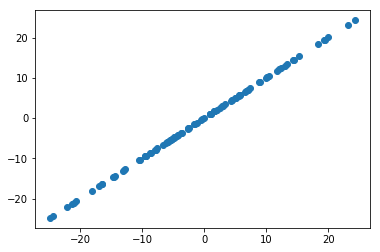

In [6]:
# return a tensor filled with random numbers that are normally distributed around zero
# also accepts a sequence of integers which then define the shape of tensor
# torch.randn(rows, column)

X = torch.randn(100, 1) * 10
y = X # creates a perfect linear model
plt.plot(X.numpy(), y.numpy(), 'o') # 'o' -> to show datapoint as circle

Text(0, 0.5, 'y')

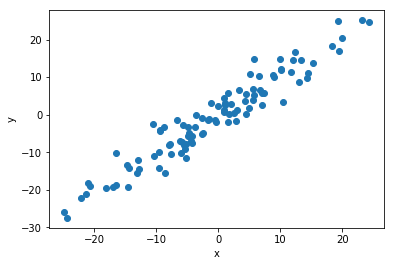

In [7]:
# to introduce some noise we'll add displacement to y
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

### The Linear class

In [0]:
import torch
from torch.nn import Linear

set the seed, the reason for setting seed is because when constructing our model, linear class will be given random
we start with random value for weight and bias and then we train our model through gradient descent alog to find optimal parameters to fit our data

In [9]:

torch.manual_seed(1)

# for every prediction we make, for every output, there is one input
model = Linear(in_features=1, out_features=1)

print(model.bias, model.weight)
# this results in our equation being y = model.weight*x + model.bias

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [10]:
# make a prediction using an input x

x = torch.tensor([2.0])
# also
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


### Custom Model

In [0]:
import torch
import torch.nn as nn

In [0]:
class LR(nn.Module):
  """
  'Module' acts as a base class for all modules.
  Here, Linear regression will be a subclass of nn.Module
    thereby inherting nn as parent class
  """
  
  def __init__(self, input_size, output_size):
    '''
    Custome model requires an input and output just like 
    the Linear class.
    '''
    
    #this allows for more freedom in use of multiple inhertiance from parent classes
    super().__init__()
    
    # *** Upto this mark is boiler plate code ****
    
    # reps the instance of class object we intend to init
    self.linear = nn.Linear(input_size, output_size)
    
    # writing the forward method that makes predictions
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [0]:
torch.manual_seed(1)

# init a new instance of your custom model
model = LR(1, 1)

In [14]:
# print the random weights and biased values that were assigned to it from nn.Linear
print(list(model.parameters()))

# (i)output depends on the output_size you have specified in model
# 0.5153 is the weight and -0.4414 is the bias

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [15]:
# recall that we use 'forward' to make predictions
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [16]:
# for multiple values
x = torch.tensor([[1.0], [3.0]])
print(model.forward(x))

tensor([[0.0739],
        [1.1044]], grad_fn=<AddmmBackward>)


### Use dataset for custom linear model

In [0]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    return self.linear(x)

In [19]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [20]:
# unpack the parameters
[w, b] = model.parameters()

# add .item to return them as python numbers rather than tensors
# w1 = w[0][0].item()
# b1 = b[0].item()
# print(w1, b1)
# cleaning up the above as
def get_params():
  return (w[0][0].item(), b[0].item())
get_params()

(0.5152631998062134, -0.44137823581695557)

In [0]:
def plot_fit(title):
  plt.title = title # setting the title
  w1, b1 = get_params()
  x1 = np.array([-30, 30]) # set the base range of plot
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r') # line plot
  plt.scatter(X, y) # dataset points as scatter plot
  plt.show()

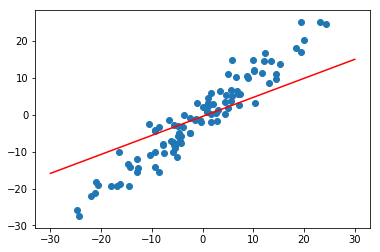

In [22]:
plot_fit('Init model')

The first fit line is not the best fit and this is corrected going forward using Gradient descent.